In [1]:
%load_ext autoreload
%autoreload 2

# Load libraries and sample data

In [2]:
import pandas as pd
import numpy as np
from utils.backtester import BackTester
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt


# Load sample data
data = pd.read_pickle('data/raw/price/SPY_20250130.pkl')
data.set_index('Date', inplace=True)
# data.index = pd.to_datetime(data.index, format="mixed")
price_data = {"SPY": data}

# Trend following strategy

Trend following Results: {'cagr': 0.09635127839056179, 'volatility': 0.13471467182252894, 'sharpe': 0.7152248310228116, 'max_drawdown': 0.26882784872667703, 'cumulative_returns': 16.271570634758902}


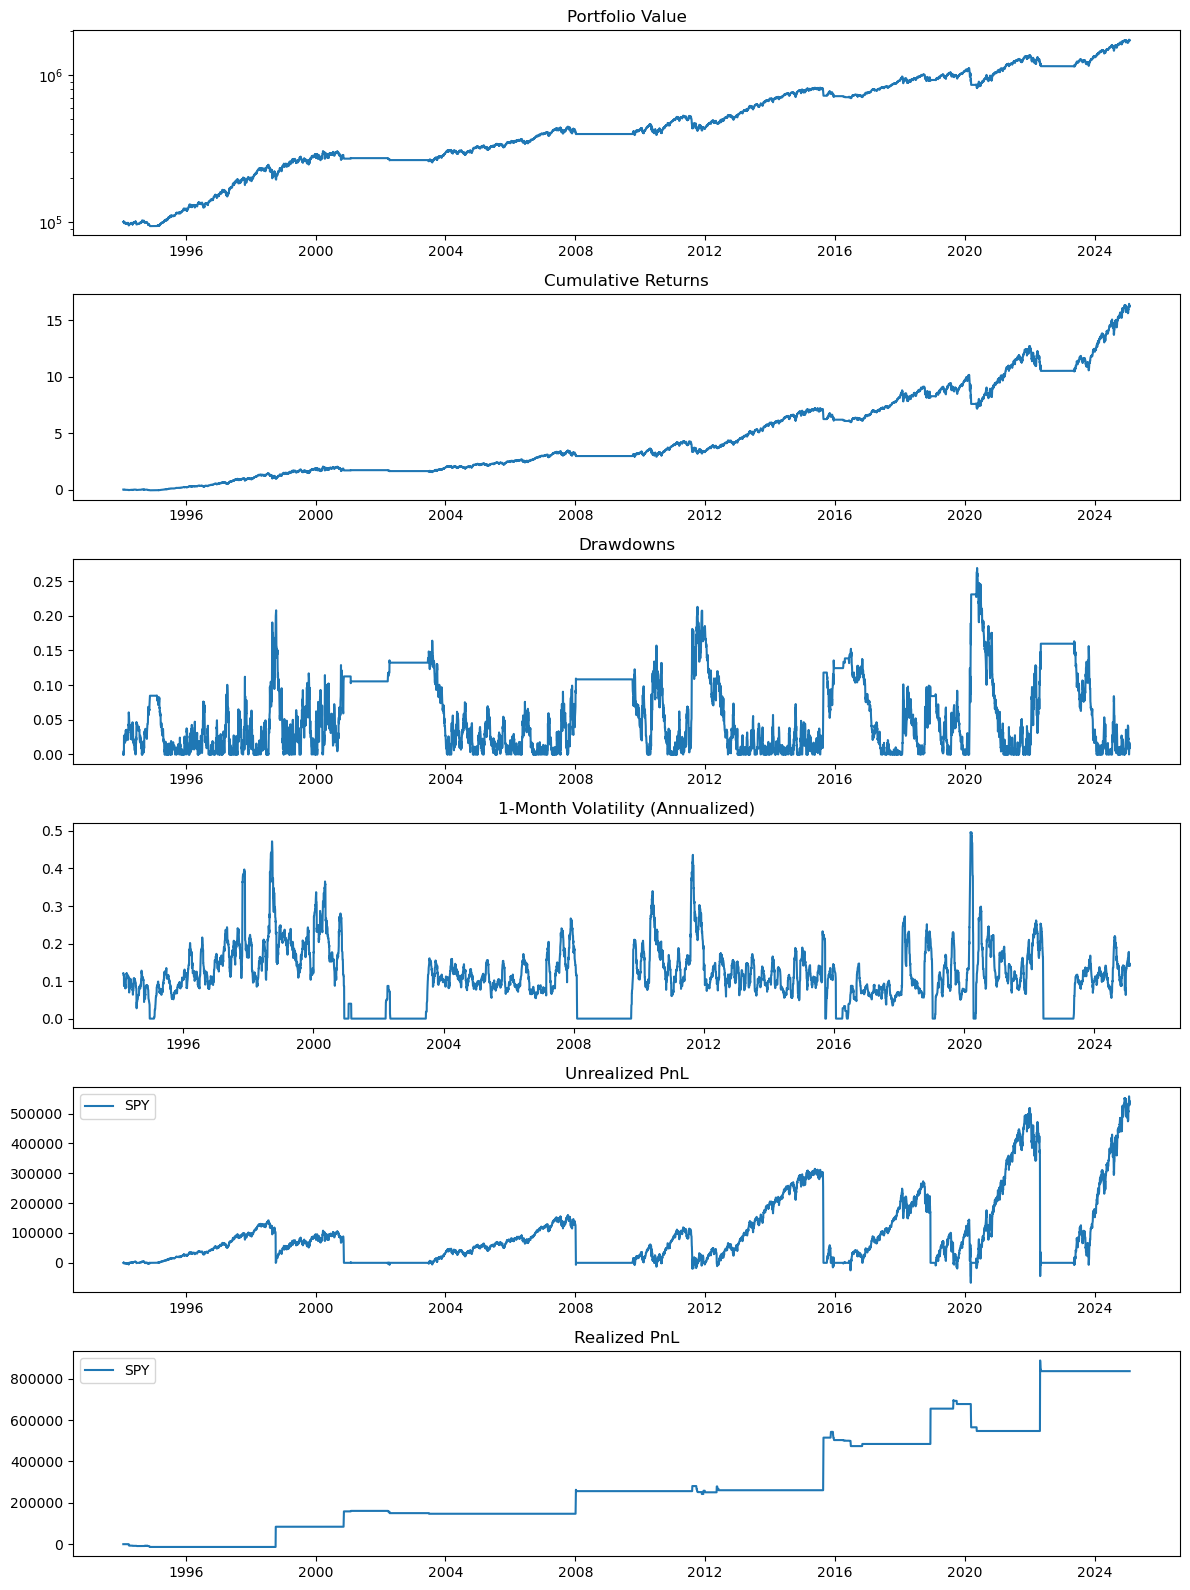

In [3]:
from strategies.trend_following import TrendFollowingStrategy

# Initialize backtester
bt = BackTester(price_data)
bt.add_strategy(TrendFollowingStrategy, tickers=['SPY'], price_data=price_data, lookback=252)
results = bt.backtest()
print("Trend following Results:", {k: v for k, v in results.items() if k != 'returns'})
bt.plot_results()

# Effect of lookback period

  0%|          | 0/247 [00:00<?, ?it/s]

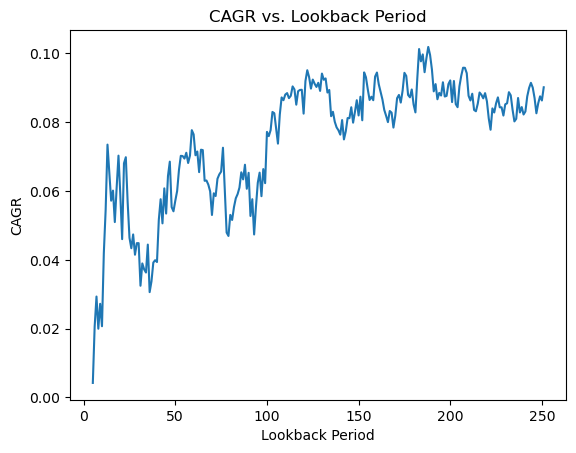

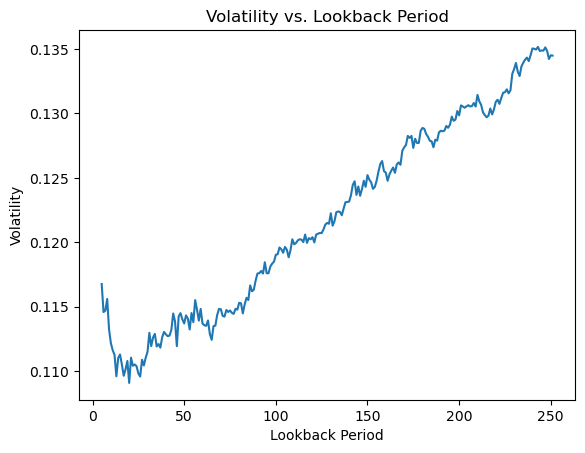

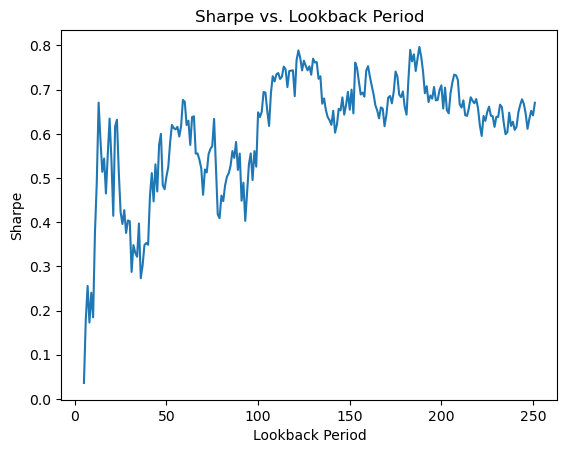

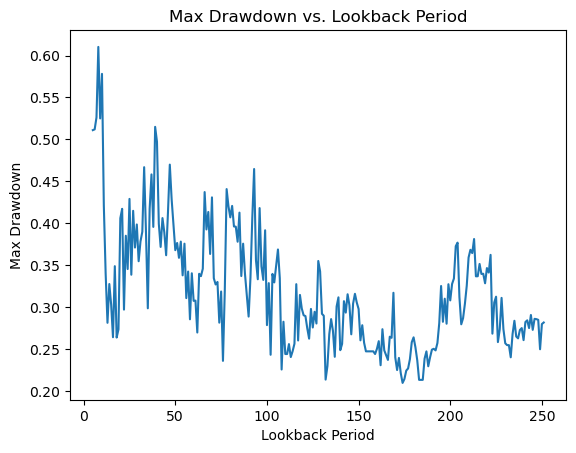

In [4]:
X = range(5, 252)
y = []
for x in tqdm(X):
    bt = BackTester(price_data)
    bt.add_strategy(TrendFollowingStrategy, tickers=['SPY'], price_data=price_data, lookback=x)
    results = bt.backtest()
    y.append(results)

plt.plot(X, [f['cagr'] for f in y])
plt.title('CAGR vs. Lookback Period')
plt.xlabel('Lookback Period')
plt.ylabel('CAGR')
plt.show()


plt.plot(X, [f['volatility'] for f in y])
plt.title('Volatility vs. Lookback Period')
plt.xlabel('Lookback Period')
plt.ylabel('Volatility')
plt.show()


plt.plot(X, [f['sharpe'] for f in y])
plt.title('Sharpe vs. Lookback Period')
plt.xlabel('Lookback Period')
plt.ylabel('Sharpe')
plt.show()


plt.plot(X, [f['max_drawdown'] for f in y])
plt.title('Max Drawdown vs. Lookback Period')
plt.xlabel('Lookback Period')
plt.ylabel('Max Drawdown')
plt.show()
